import matplotlib.pyplot as plt

In [1]:
import matplotlib.pyplot as plt


In [17]:
import pandas as pd
df = pd.read_csv('Result_8.csv')
df.head()

,company_mart.name,company_mart.deleted_week,company_mart.registration_week,company_mart.account_type
0,Key Organics,2019-07-01,1998-12-28,Buyer
1,RUCO Druckfarben,2019-07-01,1998-12-28,Buyer
2,Rubino Chem,2019-07-01,1998-12-28,Buyer
3,Zetc Gmbh & Co Kg,2019-07-01,1998-12-28,Buyer
4,Optimal Tech,2019-07-01,1998-12-28,Buyer


In [26]:
df["Registration_Date"] = pd.to_datetime(df["company_mart.registration_week"])
df["Deregistration_Date"] = pd.to_datetime(df["company_mart.deleted_week"])

# Set the time period of interest
start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2023-03-05")

# Calculate the number of registrations and deletions
num_registrations = ((df["Registration_Date"] >= start_date) & (df["Registration_Date"] <= end_date)).sum()
num_deletions = ((df["Deregistration_Date"] >= start_date) & (df["Deregistration_Date"] <= end_date)).sum()

# Print the results
print(f"Number of registrations: {num_registrations}")
print(f"Number of deletions: {num_deletions}")

Number of registrations: 49700
Number of deletions: 10916


In [27]:
# Filter data after the given date
df = df[(df['Registration_Date'] >= start_date) | (df['Deregistration_Date'] >= end_date)]

# Resample registrations and deletions by date
registrations = df.set_index('Registration_Date').resample('D').size().cumsum()
deletions = df.set_index('Deregistration_Date').resample('D').size().cumsum()



In [28]:
registrations

Registration_Date
2020-01-06       60
2020-01-07       60
2020-01-08       60
2020-01-09       60
2020-01-10       60
              ...  
2023-03-02    49700
2023-03-03    49700
2023-03-04    49700
2023-03-05    49700
2023-03-06    49736
Freq: D, Length: 1156, dtype: int64

In [29]:
deletions

Deregistration_Date
2020-05-25        1
2020-05-26        1
2020-05-27        1
2020-05-28        1
2020-05-29        1
              ...  
2023-03-02    10044
2023-03-03    10044
2023-03-04    10044
2023-03-05    10044
2023-03-06    10045
Length: 1016, dtype: int64

In [37]:
deletions.tail(25)


Deregistration_Date
2023-02-10     9992
2023-02-11     9992
2023-02-12     9992
2023-02-13    10010
2023-02-14    10010
2023-02-15    10010
2023-02-16    10010
2023-02-17    10010
2023-02-18    10010
2023-02-19    10010
2023-02-20    10024
2023-02-21    10024
2023-02-22    10024
2023-02-23    10024
2023-02-24    10024
2023-02-25    10024
2023-02-26    10024
2023-02-27    10044
2023-02-28    10044
2023-03-01    10044
2023-03-02    10044
2023-03-03    10044
2023-03-04    10044
2023-03-05    10044
2023-03-06    10045
dtype: int64

In [31]:
difference = registrations - deletions

In [32]:
difference = difference.fillna(0)
difference

2020-01-06        0.0
2020-01-07        0.0
2020-01-08        0.0
2020-01-09        0.0
2020-01-10        0.0
               ...   
2023-03-02    39656.0
2023-03-03    39656.0
2023-03-04    39656.0
2023-03-05    39656.0
2023-03-06    39691.0
Length: 1156, dtype: float64

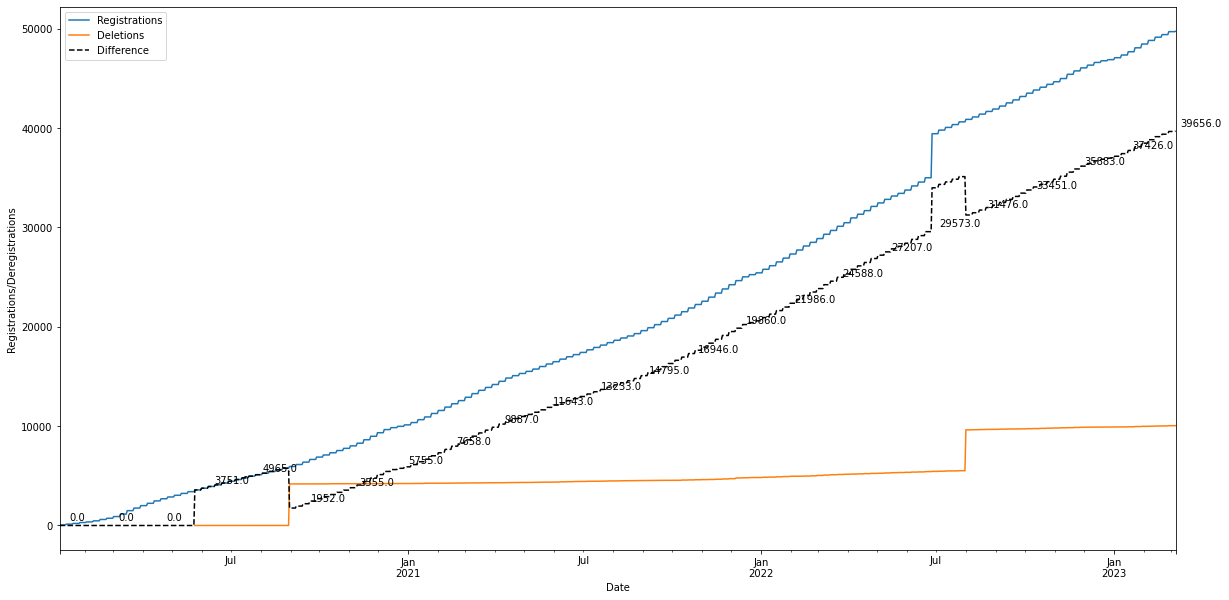

In [35]:
# Plot the increase in number of registrations and deletions over time
fig, ax = plt.subplots(figsize=(20,10))
registrations.plot(ax=ax, label='Registrations')
deletions.plot(ax=ax, label='Deletions')
difference.plot(ax=ax, label='Difference', linestyle='--', color='black')
for i, val in difference.iloc[::50].iteritems():
    ax.annotate(val, (i, difference.loc[i]), xytext=(10, 5), textcoords='offset points')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Registrations/Deregistrations')
plt.show()